#### Prepare drive for uploading data
Install the latest version of seaborn

In [0]:
# -*- coding: utf-8 -*-
"""variable_data.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1bD_xXzhMU-6k4s92kzIuYZzAmHhFNBdB

#### Prepare drive for uploading data
Install the latest version of seaborn
"""

from google.colab import drive
drive.mount('/content/gdrive/')
!pip install seaborn==0.9.0



Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
"""### Import libraries
Double check that seaborn installed correctly
"""

import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import os
import scipy.stats as stats
from sklearn.decomposition import PCA

sns.__version__



'0.9.0'

#### Import data
Pickle files are a way of storing python data objects. Here, we upload 7 different pickle files that contain different data about human protein complexes in cancer.

In [0]:
"""#### Import data
Pickle files are a way of storing python data objects. Here, we upload 7 different pickle files that contain different data about human protein complexes in cancer.
"""

pickle_abundance_percent_difference = open("percentDiffAbundant.pickle","rb")
pickle_abundance_mean_change = open("meanACC.pickle","rb")
pickle_variance_mean_change = open("VarianceMeanChange.pickle","rb")
pickle_variance_std = open("rangeVCC.pickle","rb")
pickle_abundance_std = open("rangeACC.pickle","rb")
pickle_complex_to_root = open("complexToRootPathways.pickle","rb")
pickle_variance_percent_difference = open("VariancePercentDifferent.pickle","rb")

dict_abundance_percent_difference = pickle.load(pickle_abundance_percent_difference)
dict_abundance_mean_change = pickle.load(pickle_abundance_mean_change)
dict_variance_mean_change = pickle.load(pickle_variance_mean_change)
dict_variance_std = pickle.load(pickle_variance_std)
dict_abundance_std = pickle.load(pickle_abundance_std)
dict_complex_to_root = pickle.load(pickle_complex_to_root)
dict_variance_percent_difference = pickle.load(pickle_variance_percent_difference)



In [0]:
"""#### Convert data into a dataframe
Making the data into a Pandas dataframe makes it much easier to analyze
"""

# create the first columns
df = pd.DataFrame(list(dict_abundance_percent_difference.items()), columns=['Complex', 'proportionDiffAbundant'])

#Map other values...
df['meanACC'] = df['Complex'].map(dict_abundance_mean_change)
df['rangeACC'] = df['Complex'].map(dict_abundance_std)
df['proportionDiffVariant'] = df['Complex'].map(dict_variance_percent_difference)
df['meanVCC'] = df['Complex'].map(dict_variance_mean_change)
df['rangeVCC'] = df['Complex'].map(dict_variance_std)
df = df.set_index("Complex", drop = False)

print("Number of complexes before removing any complexes: " + str(len(df.index)))



Number of complexes before removing any complexes: 3698


In [0]:
"""#### Eliminate complexes with size lower than 2
Complexes of size 1 may still play a role in cancer, but they don't tell us anything about how complexes in cancer are altered.
"""

complexToProtein = pickle.load(open("BrentsComplexToProteins.pickle","rb"))
complexToSize = pickle.load(open("complexToSize.pickle","rb"))

newDF = pd.DataFrame()
complexSize = []
for index, row in df.iterrows():
  if row[0] in list(complexToProtein.keys()):
#     if abundanceComplexToSize[row[0]] != varianceComplexToSize[row[0]]:
#       print(abundanceComplexToSize[row[0]])
#       print(varianceComplexToSize[row[0]])
    complexSize.append(complexToSize[row[0]])
  
df["complexSize"] = complexSize
df = df[df["complexSize"] > 1]

df = df.drop(columns=["complexSize","Complex"])

print("Number of complexes after removing complexes of size 1: " + str(len(df.index)))


Number of complexes after removing complexes of size 1: 1256


In [0]:

"""#### Remove rows (complexes) that contain NAN values"""

df = df.dropna()

print("Number of complexes after removing NAN rows: " + str(len(df.index)))



Number of complexes after removing NAN rows: 1256


## Summary Statistics for 6 Variables (Table 1)

In [0]:
"""#### Get Summary information for each variable"""

print(np.mean(df['proportionDiffAbundant']))
print(np.std(df['proportionDiffAbundant']))
print()
print(np.mean(df['meanACC']))
print(np.std(df['meanACC']))
print()
print(np.mean(df['rangeACC']))
print(np.std(df['rangeACC']))
print()
print(np.mean(df['proportionDiffVariant']))
print(np.std(df['proportionDiffVariant']))
print()
print(np.mean(df['meanVCC']))
print(np.std(df['meanVCC']))
print()
print(np.mean(df['rangeVCC']))
print(np.std(df['rangeVCC']))
print()



0.18361094547265527
0.25403176445586456

1.3584356943262728
0.6784858512720363

0.9893368693632291
1.1040183743783403

0.230649634747717
0.2367821615668924

1.3607340302341329
4.469157670122956

9.831239022065278
21.563008561117943



## Correlation Table

In [0]:
cv = []

abundDiffRow = []

print("Abundance % Diff to all other vars:")
abundDiffRow.append(stats.pearsonr(df['proportionDiffAbundant'], df['proportionDiffAbundant'])[0])
print(stats.pearsonr(df['proportionDiffAbundant'], df['proportionDiffAbundant']))
abundDiffRow.append(stats.pearsonr(df['proportionDiffAbundant'], df['meanACC'])[0])
print(stats.pearsonr(df['proportionDiffAbundant'], df['rangeACC']))
abundDiffRow.append(stats.pearsonr(df['proportionDiffAbundant'], df['rangeACC'])[0])
print(stats.pearsonr(df['proportionDiffAbundant'], df['proportionDiffVariant']))
abundDiffRow.append(stats.pearsonr(df['proportionDiffAbundant'], df['proportionDiffVariant'])[0])
print(stats.pearsonr(df['proportionDiffAbundant'], df['meanVCC']))
abundDiffRow.append(stats.pearsonr(df['proportionDiffAbundant'], df['meanVCC'])[0])
print(stats.pearsonr(df['proportionDiffAbundant'], df['rangeVCC']))
abundDiffRow.append(stats.pearsonr(df['proportionDiffAbundant'], df['rangeVCC'])[0])
cv.append(abundDiffRow)

newRow = []
print("Abundance mean change to all other vars:")

newRow.append(stats.pearsonr(df['meanACC'], df['proportionDiffAbundant'])[0])
newRow.append(stats.pearsonr(df['meanACC'], df['meanACC'])[0])
newRow.append(stats.pearsonr(df['meanACC'], df['rangeACC'])[0])
newRow.append(stats.pearsonr(df['meanACC'], df['proportionDiffVariant'])[0])
newRow.append(stats.pearsonr(df['meanACC'], df['meanVCC'])[0])
newRow.append(stats.pearsonr(df['meanACC'], df['rangeVCC'])[0])
cv.append(newRow)

print(stats.pearsonr(df['meanACC'], df['proportionDiffAbundant']))
print(stats.pearsonr(df['meanACC'], df['meanACC']))
print(stats.pearsonr(df['meanACC'], df['rangeACC']))
print(stats.pearsonr(df['meanACC'], df['proportionDiffVariant']))
print(stats.pearsonr(df['meanACC'], df['meanVCC']))
print(stats.pearsonr(df['meanACC'], df['rangeVCC']))

print()
print("Abundance STD to all other vars:")

newRow = []

newRow.append(stats.pearsonr(df['rangeACC'], df['proportionDiffAbundant'])[0])
newRow.append(stats.pearsonr(df['rangeACC'], df['meanACC'])[0])
newRow.append(stats.pearsonr(df['rangeACC'], df['rangeACC'])[0])
newRow.append(stats.pearsonr(df['rangeACC'], df['proportionDiffVariant'])[0])
newRow.append(stats.pearsonr(df['rangeACC'], df['meanVCC'])[0])
newRow.append(stats.pearsonr(df['rangeACC'], df['rangeVCC'])[0])
cv.append(newRow)

print(stats.pearsonr(df['rangeACC'], df['proportionDiffAbundant']))
print(stats.pearsonr(df['rangeACC'], df['meanACC']))
print(stats.pearsonr(df['rangeACC'], df['rangeACC']))
print(stats.pearsonr(df['rangeACC'], df['proportionDiffVariant']))
print(stats.pearsonr(df['rangeACC'], df['meanVCC']))
print(stats.pearsonr(df['rangeACC'], df['rangeVCC']))

print("Variance % Diff to all other vars:")

newRow = []

newRow.append(stats.pearsonr(df['proportionDiffVariant'], df['proportionDiffAbundant'])[0])
newRow.append(stats.pearsonr(df['proportionDiffVariant'], df['meanACC'])[0])
newRow.append(stats.pearsonr(df['proportionDiffVariant'], df['rangeACC'])[0])
newRow.append(stats.pearsonr(df['proportionDiffVariant'], df['proportionDiffVariant'])[0])
newRow.append(stats.pearsonr(df['proportionDiffVariant'], df['meanVCC'])[0])
newRow.append(stats.pearsonr(df['proportionDiffVariant'], df['rangeVCC'])[0])
cv.append(newRow)

print(stats.pearsonr(df['proportionDiffVariant'], df['proportionDiffAbundant']))
print(stats.pearsonr(df['proportionDiffVariant'], df['meanACC']))
print(stats.pearsonr(df['proportionDiffVariant'], df['rangeACC']))
print(stats.pearsonr(df['proportionDiffVariant'], df['proportionDiffVariant']))
print(stats.pearsonr(df['proportionDiffVariant'], df['meanVCC']))
print(stats.pearsonr(df['proportionDiffVariant'], df['rangeVCC']))

print("Variance Mean Change to all other vars:")
newRow = []

newRow.append(stats.pearsonr(df['meanVCC'], df['proportionDiffAbundant'])[0])
newRow.append(stats.pearsonr(df['meanVCC'], df['meanACC'])[0])
newRow.append(stats.pearsonr(df['meanVCC'], df['rangeACC'])[0])
newRow.append(stats.pearsonr(df['meanVCC'], df['proportionDiffVariant'])[0])
newRow.append(stats.pearsonr(df['meanVCC'], df['meanVCC'])[0])
newRow.append(stats.pearsonr(df['meanVCC'], df['rangeVCC'])[0])
cv.append(newRow)

print(stats.pearsonr(df['meanVCC'], df['proportionDiffAbundant']))
print(stats.pearsonr(df['meanVCC'], df['meanACC']))
print(stats.pearsonr(df['meanVCC'], df['rangeACC']))
print(stats.pearsonr(df['meanVCC'], df['proportionDiffVariant']))
print(stats.pearsonr(df['meanVCC'], df['meanVCC']))
print(stats.pearsonr(df['meanVCC'], df['rangeVCC']))

print("Variance STD to all other vars:")
newRow = []

newRow.append(stats.pearsonr(df['rangeVCC'], df['proportionDiffAbundant'])[0])
newRow.append(stats.pearsonr(df['rangeVCC'], df['meanACC'])[0])
newRow.append(stats.pearsonr(df['rangeVCC'], df['rangeACC'])[0])
newRow.append(stats.pearsonr(df['rangeVCC'], df['proportionDiffVariant'])[0])
newRow.append(stats.pearsonr(df['rangeVCC'], df['meanVCC'])[0])
newRow.append(stats.pearsonr(df['rangeVCC'], df['rangeVCC'])[0])
cv.append(newRow)

print(stats.pearsonr(df['rangeVCC'], df['proportionDiffAbundant']))
print(stats.pearsonr(df['rangeVCC'], df['meanACC']))
print(stats.pearsonr(df['rangeVCC'], df['rangeACC']))
print(stats.pearsonr(df['rangeVCC'], df['proportionDiffVariant']))
print(stats.pearsonr(df['rangeVCC'], df['meanVCC']))
print(stats.pearsonr(df['rangeVCC'], df['rangeVCC']))


Abundance % Diff to all other vars:
(1.0, 0.0)
(0.18275037311465378, 6.788035840130214e-11)
(0.36426245852193795, 1.0599293551328979e-40)
(-0.05206054807176715, 0.06511841791748792)
(0.0641095166552455, 0.02307911776187278)
Abundance mean change to all other vars:
(0.4114625378595443, 1.689462334081606e-52)
(1.0, 0.0)
(0.6428788928304022, 2.2084955522725986e-147)
(0.5642717718038148, 1.6690732449110046e-106)
(0.1289314559421643, 4.563009541309354e-06)
(0.4245293771251443, 4.071292843013527e-56)

Abundance STD to all other vars:
(0.18275037311465378, 6.788035840130214e-11)
(0.6428788928304022, 2.2084955522725986e-147)
(1.0, 0.0)
(0.2279345132239252, 2.8893369831783204e-16)
(-0.07385044279135689, 0.008838559441557784)
(0.4612941196024321, 3.4314774622746173e-67)
Variance % Diff to all other vars:
(0.36426245852193795, 1.0599293551328979e-40)
(0.5642717718038148, 1.6690732449110046e-106)
(0.2279345132239252, 2.8893369831783204e-16)
(1.0, 0.0)
(0.1486871398200684, 1.198726548849088e-07)
(0

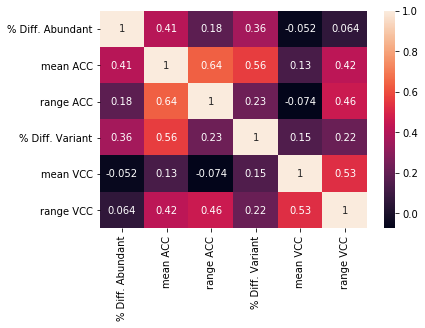

In [0]:
lables = ["% Diff. Abundant", "mean ACC", "range ACC", "% Diff. Variant", "mean VCC", "range VCC"]
cvDf = pd.DataFrame(cv, columns = lables)
cvDf = cvDf.set_index(cvDf.columns.values)
cvDf

# cvDf = cvDf.iloc[1:]
# cvDf.drop(cvDf.columns[len(cvDf.columns)-1], axis=1, inplace=True)
# mask = np.zeros_like(cvDf)
# mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(cvDf, annot=True)



## Protein Kinase Stuff

In [0]:
"""### Get a list of protein kinases (pkins)"""

import re
pkinfam_file = open("pkinfam.txt", 'r')
pkins = set()
for line in pkinfam_file:
  line = line.strip()
  line = re.sub("\(","~",line)
  line = re.sub("\)","~",line)
  line = re.sub(" ","",line)
  line = line.split("~")
  pkins.add(line[1])




In [0]:
"""### get a list of which complexes contain protein kinases"""

complexToProteinFile = open("BrentsComplexToProteins.pickle","rb")
complexToProtein = pickle.load(complexToProteinFile)
containsKinase = []
for index, row in df.iterrows():
#   print(complexToProtein[index])
  hasKinase = "no"
  for protein in complexToProtein[index]:
    if protein in pkins:
      hasKinase = "yes"
  containsKinase.append(hasKinase)
print(len(containsKinase))
df["containsKinase"] = containsKinase
print(df.shape)
df.head()



1256
(1256, 7)


,proportionDiffAbundant,meanACC,rangeACC,proportionDiffVariant,meanVCC,rangeVCC,containsKinase
Complex,,,,,,,
R-HSA-1011605,0.00,1.327413,0.066068,0.333333,1.222803,0.599173,no
R-HSA-1012969,0.00,1.156748,0.471734,0.090909,2.564588,4.010420,no
R-HSA-114539,0.25,1.460141,0.816821,0.250000,0.964953,2.371804,no
R-HSA-114543,0.25,1.460141,0.816821,0.250000,0.964953,2.371804,no
R-HSA-182915,0.00,1.267504,0.250221,0.500000,2.337438,3.556118,no


In [0]:
"""### Get summary statistics for Kinase-containing complexes"""

hasKinase = df.loc[df['containsKinase'] == "yes"]
noKinase = df.loc[df['containsKinase'] == "no"]


print(np.mean(hasKinase['proportionDiffAbundant']))
print(np.std(hasKinase['proportionDiffAbundant']))
print()
print(np.mean(hasKinase['meanACC']))
print(np.std(hasKinase['meanACC']))
print()
print(np.mean(hasKinase['rangeACC']))
print(np.std(hasKinase['rangeACC']))
print()
print(np.mean(hasKinase['proportionDiffVariant']))
print(np.std(hasKinase['proportionDiffVariant']))
print()
print(np.mean(hasKinase['meanVCC']))
print(np.std(hasKinase['meanVCC']))
print()
print(np.mean(hasKinase['rangeVCC']))
print(np.std(hasKinase['rangeVCC']))
print()


0.10667892296508734
0.1582477778441858

1.2447566025413435
0.43763707202875435

1.0084556248290983
1.0214966701353516

0.22069689717260157
0.18707349402498766

2.3259349395708653
7.42595273292372

11.586651025278757
23.694567625041035



In [0]:

"""### Get summary statistics for non-kinase containing complexes"""

print(np.mean(noKinase['proportionDiffAbundant']))
print(np.std(noKinase['proportionDiffAbundant']))
print()
print(np.mean(noKinase['meanACC']))
print(np.std(noKinase['meanACC']))
print()
print(np.mean(noKinase['rangeACC']))
print(np.std(noKinase['rangeACC']))
print()
print(np.mean(noKinase['proportionDiffVariant']))
print(np.std(noKinase['proportionDiffVariant']))
print()
print(np.mean(noKinase['meanVCC']))
print(np.std(noKinase['meanVCC']))
print()
print(np.mean(noKinase['rangeVCC']))
print(np.std(noKinase['rangeVCC']))
print()



0.20743660833474878
0.2726928827394058

1.3936418364119074
0.7337256349737262

0.9834158366485612
1.1282861414338505

0.23373197370476523
0.2501014297250724

1.0618136234843816
2.95008461671252

9.287592134730167
20.828758559616418



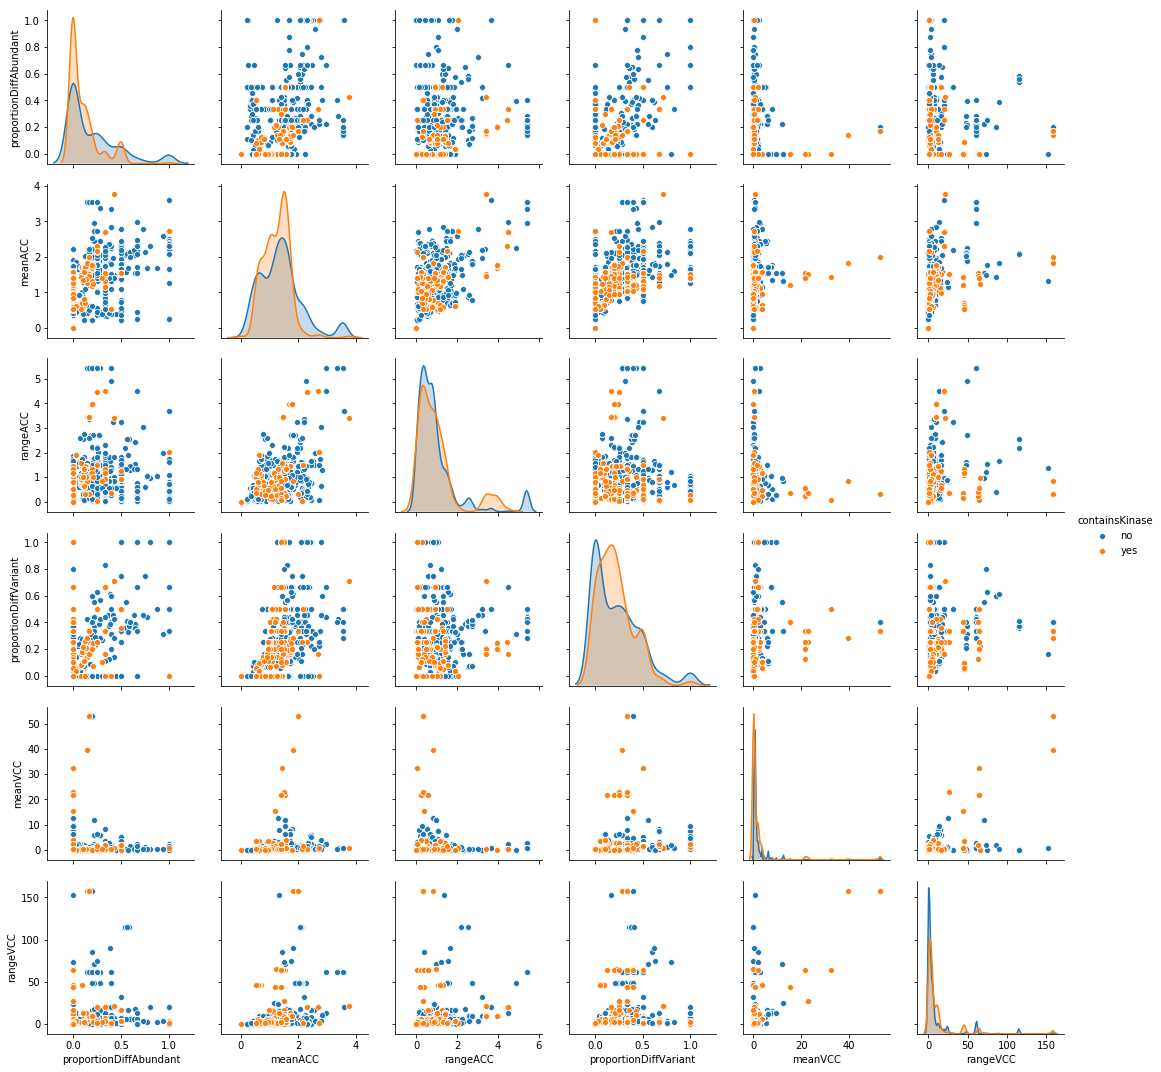

In [0]:
"""### Plot the 6 variables against each other, coloring according to the presence of protein kinases in the complex"""

g = sns.pairplot(df, hue="containsKinase")



In [0]:
"""#### Find the most variable protein-kinase containing complex"""

print(df.columns)
for index, row in df.iterrows():
#   if int(row[5]) > 110:
    if int(row[4]) > 20:
      print("reactome ID:" + index)
      print("Protein Kinases:")
     
      for protein in complexToProtein[index]:
        if protein in pkins:
          print(uniprotToGene[protein])
          
          # get the row of the protein
#           for index2, row in varianceDF.iterrows():
# #             print(index2)
#             if index2 in uniprotToGene:
#               geneName = uniprotToGene[index2]
# #             protein2 = 
#               print(list(uniprotToGene.values()))
              
#               if geneName == protein:
#                 print(row)
#           proteinDF = varianceDF.loc[varianceDF.index == protein]
#           print(proteinDF.head())
#           print(row)
      print("Pathways: " + str(complexToPathways[index]))
      print("*******")



Index(['proportionDiffAbundant', 'meanACC', 'rangeACC',
       'proportionDiffVariant', 'meanVCC', 'rangeVCC', 'containsKinase'],
      dtype='object')
reactome ID:R-HSA-2029159
Protein Kinases:
PAK1
Pathways: ['R-HSA-2029482', 'R-HSA-5627123', 'R-HSA-5687128']
*******
reactome ID:R-HSA-389782
Protein Kinases:
PAK2
PAK1
Pathways: ['R-HSA-389359', 'R-HSA-5687128']
*******
reactome ID:R-HSA-2685694
Protein Kinases:
PAK2
PAK1
Pathways: ['R-HSA-2871796']
*******
reactome ID:R-HSA-2424456
Protein Kinases:
FYN
LCK
PIK3CB
SYK
Pathways: ['R-HSA-2424491']
*******
reactome ID:R-HSA-2134509
Protein Kinases:
TGFBR1
Pathways: ['R-HSA-2173791']
*******
reactome ID:R-HSA-2134514
Protein Kinases:
Pathways: ['R-HSA-2173791']
*******
reactome ID:R-HSA-2134522
Protein Kinases:
TGFBR1
Pathways: ['R-HSA-2173791']
*******
reactome ID:R-HSA-2160934
Protein Kinases:
TGFBR1
Pathways: ['R-HSA-2173791']
*******
reactome ID:R-HSA-2134529
Protein Kinases:
Pathways: ['R-HSA-2173791']
*******
reactome ID:R-HSA-21345

## Get P-Values for kinase-no kinase summary statistics

In [0]:
noKinase.dropna()
hasKinase.dropna()

varstdNo = []
for x in noKinase["rangeVCC"]:
  if x != "nan":
    varstdNo.append(x)
print(varstdNo)
varstdHas = []
for x in hasKinase["rangeVCC"]:
  if x != "nan":
    varstdHas.append(x)
print(varstdHas)


abstdNo = []
for x in noKinase["rangeACC"]:
  if x != "nan":
    abstdNo.append(x)
print(abstdNo)
abstdHas = []
for x in hasKinase["rangeACC"]:
  if x != "nan":
    abstdHas.append(x)
print(abstdHas)


shapiro = []
shapiro.append(stats.shapiro(noKinase['proportionDiffAbundant'])[0])
shapiro.append(stats.shapiro(noKinase['meanACC'])[0])
shapiro.append(stats.shapiro(abstdNo)[0])
shapiro.append(stats.shapiro(noKinase['proportionDiffVariant'])[0])
shapiro.append(stats.shapiro(noKinase['meanVCC'])[0])
shapiro.append(stats.shapiro(varstdNo)[0])

shapiro.append(stats.shapiro(hasKinase['proportionDiffAbundant'])[0])
shapiro.append(stats.shapiro(hasKinase['meanACC'])[0])
shapiro.append(stats.shapiro(abstdHas)[0])
shapiro.append(stats.shapiro(hasKinase['proportionDiffVariant'])[0])
shapiro.append(stats.shapiro(hasKinase['meanVCC'])[0])
shapiro.append(stats.shapiro(varstdHas)[0])

pVals = []
F = (np.var(noKinase['proportionDiffAbundant']) / np.var(hasKinase['proportionDiffAbundant']))
p_val = stats.f.cdf(F, len(noKinase['proportionDiffAbundant']), len(hasKinase['proportionDiffAbundant']))
pVals.append(p_val)
F = (np.var(noKinase['meanACC']) / np.var(hasKinase['meanACC']))
p_val = stats.f.cdf(F, len(noKinase['meanACC']), len(hasKinase['meanACC']))
pVals.append(p_val)
F = (np.var(abstdNo) / np.var(abstdHas))
p_val = stats.f.cdf(F, len(abstdNo), len(abstdHas))
pVals.append(p_val)
F = (np.var(noKinase['proportionDiffVariant']) / np.var(hasKinase['proportionDiffVariant']))
p_val = stats.f.cdf(F, len(noKinase['proportionDiffVariant']), len(hasKinase['proportionDiffVariant']))
pVals.append(p_val)
F = (np.var(noKinase['meanVCC']) / np.var(hasKinase['meanVCC']))
p_val = stats.f.cdf(F, len(noKinase['meanVCC']), len(hasKinase['meanVCC']))
pVals.append(p_val)
F = (np.var(varstdNo) / np.var(varstdHas))
p_val = stats.f.cdf(F, len(varstdNo), len(varstdHas))
pVals.append(p_val)

pVals
# varstdNo = [x for x in noKinase['VarianceSTD'] if x != 'nan']
# varstdHas = [x for x in hasKinase['VarianceSTD'] if x != 'nan']



t = []
t.append(stats.ttest_ind(noKinase['proportionDiffAbundant'], hasKinase['proportionDiffAbundant'], equal_var=False)[1])
t.append(stats.ttest_ind(noKinase['meanACC'], hasKinase['meanACC'], equal_var=False)[1])
t.append(stats.ttest_ind(abstdNo, abstdHas, equal_var=False)[1])
t.append(stats.ttest_ind(noKinase['proportionDiffVariant'], hasKinase['proportionDiffVariant'], equal_var=False)[1])
t.append(stats.ttest_ind(noKinase['meanVCC'], hasKinase['meanVCC'], equal_var=False)[1])
t.append(stats.ttest_ind(varstdNo, varstdHas, equal_var=False)[1])
print(shapiro)
print(pVals)
print()
print(t)
alpha = 0.05

# from statsmodels.sandbox.stats.multicomp import multipletests
# shaprio = multipletests(shapiro, alpha, method='bonferroni')
# pVals = multipletests(pVals, alpha, method='bonferroni')
# t = multipletests(t, alpha, method='bonferroni')

# print(shapiro[1])
# print(pVals[1])
# print(t[1])

[0.5991726048445978, 4.010419514747094, 2.371803922525457, 2.371803922525457, 3.556118280031603, 3.556118280031603, 3.556118280031603, 6.663215080253307, 6.663215080253307, 6.663215080253307, 6.757703680174636, 6.663215080253307, 15.741242083104947, 15.210658940869443, 15.210658940869443, 1.4906578532090662, 2.371803922525457, 2.371803922525457, 15.741242083104947, 14.946711379814028, 3.834192534391481, 3.834192534391481, 3.834192534391481, 2.371803922525457, 2.371803922525457, 0.38946224363365334, 0.38946224363365334, 0.38946224363365334, 0.6442644538624571, 0.6442644538624571, 1.0853884869770838, 1.0853884869770838, 0.6442644538624571, 0.6442644538624571, 6.5614555626792646, 6.5614555626792646, 6.5614555626792646, 0.6442644538624571, 6.5614555626792646, 6.5614555626792646, 6.5614555626792646, 0.6442644538624571, 0.6442644538624571, 0.6442644538624571, 0.7502187654801309, 0.7502187654801309, 0.7502187654801309, 0.7502187654801309, 0.6442644538624571, 0.6442644538624571, 0.644264453862

## Make a pairplot for just mean ACC vs mean VCC

['R-HSA-1011605', 'R-HSA-1012969', 'R-HSA-114539', 'R-HSA-114543', 'R-HSA-182915', 'R-HSA-182917', 'R-HSA-182932', 'R-HSA-182956', 'R-HSA-194875', 'R-HSA-194890', 'R-HSA-194900', 'R-HSA-194912', 'R-HSA-194915', 'R-HSA-2029140', 'R-HSA-2029159', 'R-HSA-2197680', 'R-HSA-2197683', 'R-HSA-376011', 'R-HSA-389782', 'R-HSA-3928519', 'R-HSA-3928536', 'R-HSA-3928566', 'R-HSA-418820', 'R-HSA-418834', 'R-HSA-442278', 'R-HSA-442290', 'R-HSA-442565', 'R-HSA-442584', 'R-HSA-2029147', 'R-HSA-2029148', 'R-HSA-2130182', 'R-HSA-2400008', 'R-HSA-2685694', 'R-HSA-3928534', 'R-HSA-3928537', 'R-HSA-3928560', 'R-HSA-399874', 'R-HSA-399876', 'R-HSA-418814', 'R-HSA-418826', 'R-HSA-442313', 'R-HSA-442315', 'R-HSA-2029130', 'R-HSA-418829', 'R-HSA-1013011', 'R-HSA-1013017', 'R-HSA-1013019', 'R-HSA-114547', 'R-HSA-114551', 'R-HSA-114554', 'R-HSA-114557', 'R-HSA-164384', 'R-HSA-164386', 'R-HSA-167403', 'R-HSA-167418', 'R-HSA-167426', 'R-HSA-167434', 'R-HSA-167436', 'R-HSA-167439', 'R-HSA-167441', 'R-HSA-391179', 'R

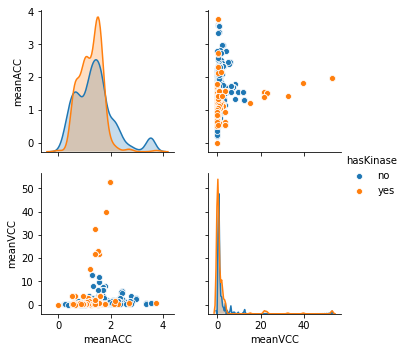

In [0]:
index = list(df.index)
meanACC = list(df["meanACC"])
meanVCC = list(df["meanVCC"])
hasKinase = list(df["containsKinase"])

print(index)
print(meanACC)
print(meanVCC)
print(hasKinase)

ndf = {}
ndf["Complex"] = index
ndf["meanACC"] = meanACC
ndf["meanVCC"] = meanVCC
ndf["hasKinase"] = hasKinase

meansDf = pd.DataFrame(ndf, columns=['Complex', 'meanACC', 'meanVCC', 'hasKinase'])
g = sns.pairplot(meansDf, hue="hasKinase")

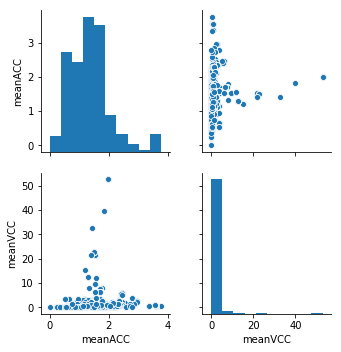

In [0]:
g = sns.pairplot(meansDf)